In [26]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [27]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [28]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.colors as clrs

from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from keras.models import load_model

#for data processing
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

import tensorflow as tf

import pickle

import time

In [25]:
train_matrices_path = "/home/oala/Documents/QUEAI/luis_messy/quick_and_dirty/conv_test_run_drop/matrices-train/epoch1000.pickle"
test_matrices_path = "/home/oala/Documents/QUEAI/luis_messy/quick_and_dirty/conv_test_run_drop/matrices-test/epoch1000.pickle"

In [50]:
def min_max_rescale_one_to_one(datapoint):
    minimum = np.amin(datapoint)
    maximum = np.amax(datapoint)
    return (2*(datapoint - minimum)/(maximum - minimum))-1

def min_max_rescale_zero_to_one(datapoint):
    minimum = np.amin(datapoint)
    maximum = np.amax(datapoint)
    #return (datapoint - minimum)/(maximum - minimum)
    return datapoint

def make_plot_var_pred(matrices_path, data_split, N):
    with open(matrices_path, 'rb') as handle:
        matrices = pickle.load(handle)
    imgs = matrices['imgs']
    refs = matrices['refs']
    mean_pred = matrices['mean_out']
    var_pred = matrices['var_out']
    
    print(mean_pred.shape, refs.shape)
    
    T = imgs.shape[1]
    
    for i in range(6):
        
        error = np.abs(refs[i,:,0] - mean_pred[i,:,0])
        
        plt.figure(figsize = (20,10))
        plt.plot(np.arange(T), min_max_rescale_one_to_one(mean_pred[i,:,0]), label = 'Prediction', color = 'blue', linestyle='--', alpha=0.5)
        plt.plot(np.arange(T), min_max_rescale_one_to_one(imgs[i,:,0]), label = 'Input', color = 'black', linestyle=':', alpha=0.5)
        plt.plot(np.arange(T), min_max_rescale_one_to_one(refs[i,:,0]), label = 'Target', color = 'green')
        
        plt.plot(np.arange(T), min_max_rescale_zero_to_one(error), label = 'True absolute error', color = 'red', lw= 1.)
        
        plt.plot(np.arange(T), min_max_rescale_zero_to_one(var_pred[i,:,0]), label = 'Predicted variance', color = 'orange', linestyle=':', lw= 1.)
        
        plt.legend()
        plt.show()
        plt.close()
        
        
def make_plot_error_only(matrices_path, data_split, N):
    with open(matrices_path, 'rb') as handle:
        matrices = pickle.load(handle)
    imgs = matrices['imgs']
    refs = matrices['refs']
    mean_pred = matrices['mean_out']
    var_pred = matrices['var_out']
    
    T = imgs.shape[1]
    
    for i in range(6):
        
        error = np.abs(refs[i,:,0] - mean_pred[i,:,0])
        '''
        plt.figure(figsize = (20,10))
        plt.plot(np.arange(T), error, label = 'True absolute error', color = 'red', lw= 1.)
        
        #plt.plot(np.arange(T), var_pred[i,:,0,0], label = 'Predicted variance', color = 'orange', linestyle=':', lw= 1.)
        
        plt.legend()
        plt.show()
        plt.close()
        
        plt.figure(figsize = (20,10))
        #plt.plot(np.arange(T), error, label = 'True absolute error', color = 'red', lw= 1.)
        
        plt.plot(np.arange(T), var_pred[i,:,0,0], label = 'Predicted variance', color = 'orange', linestyle=':', lw= 1.)
        
        plt.legend()
        plt.show()
        plt.close()
        '''
        fig, ax1 = plt.subplots(figsize = (20,10))
        ax1.plot(np.arange(T), min_max_rescale_zero_to_one(error), label = 'True absolute error', color = 'red', lw= 1.)
        # Make the y-axis label, ticks and tick labels match the line color.
        ax1.set_ylabel('True absolute error', color='red')
        ax1.tick_params('y', colors='red')

        ax2 = ax1.twinx()
        ax2.plot(np.arange(T), min_max_rescale_zero_to_one(var_pred[i,:,0]), label = 'Predicted variance', color = 'blue', linestyle=':', lw= 1.)
        ax2.set_ylabel('Predicted variance', color = 'blue')
        ax2.tick_params('y', colors='blue')

        fig.tight_layout()
        plt.show()
        plt.show()
        

def SNR(rec, oracle):
    sumP = np.sum(oracle)
    sumI = np.sum(rec)
    sumIP = np.sum(oracle*rec)
    sumI2 = np.sum(rec**2)
    A = np.array([[sumI2, sumI],[sumI, oracle.size]])
    b = np.array([[sumIP],[sumP]])
    c,_,_,_ = np.linalg.lstsq(A,b)
    #print(c)
    rec = c[0]*rec + c[1]
    err = np.sum((oracle - rec)**2)
    SNR = 10*np.log10(np.sum(oracle**2)/err)

    return SNR

def avg_SNR(REC, ORACLE):
    N = REC.shape[0]
    total_SNR = 0
    for i in range(N):
        total_SNR += SNR(REC[i], ORACLE[i])

    return total_SNR/N

(6, 512, 1) (6, 512, 1)


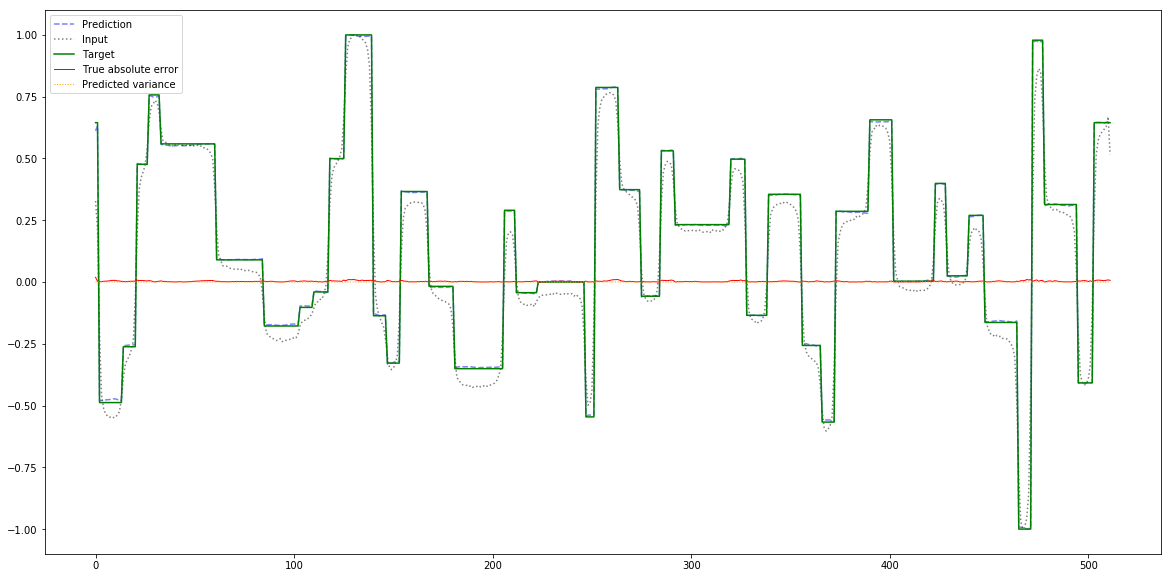

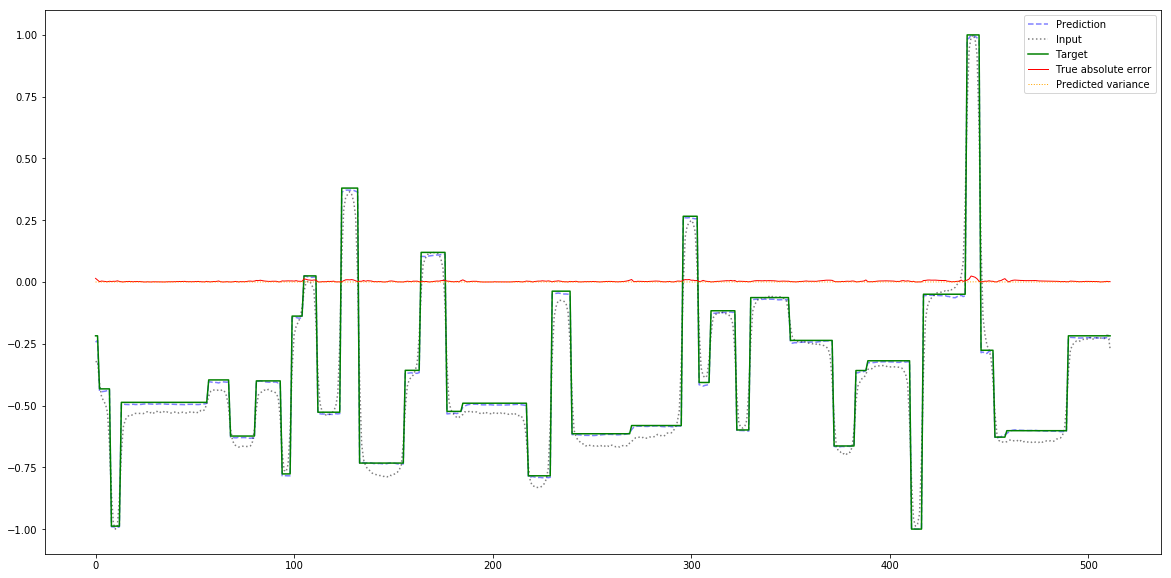

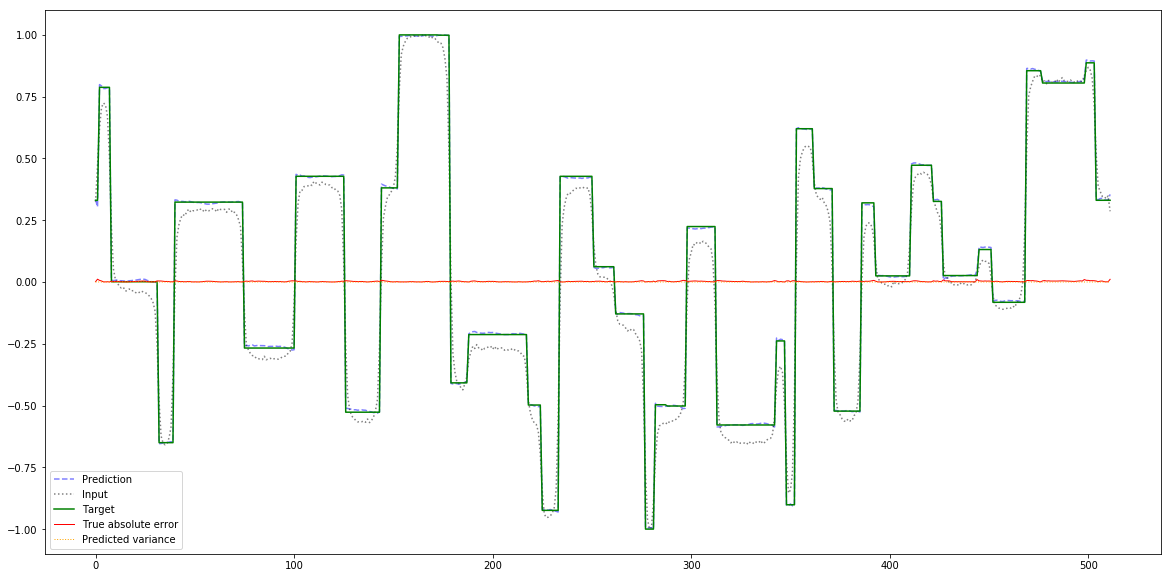

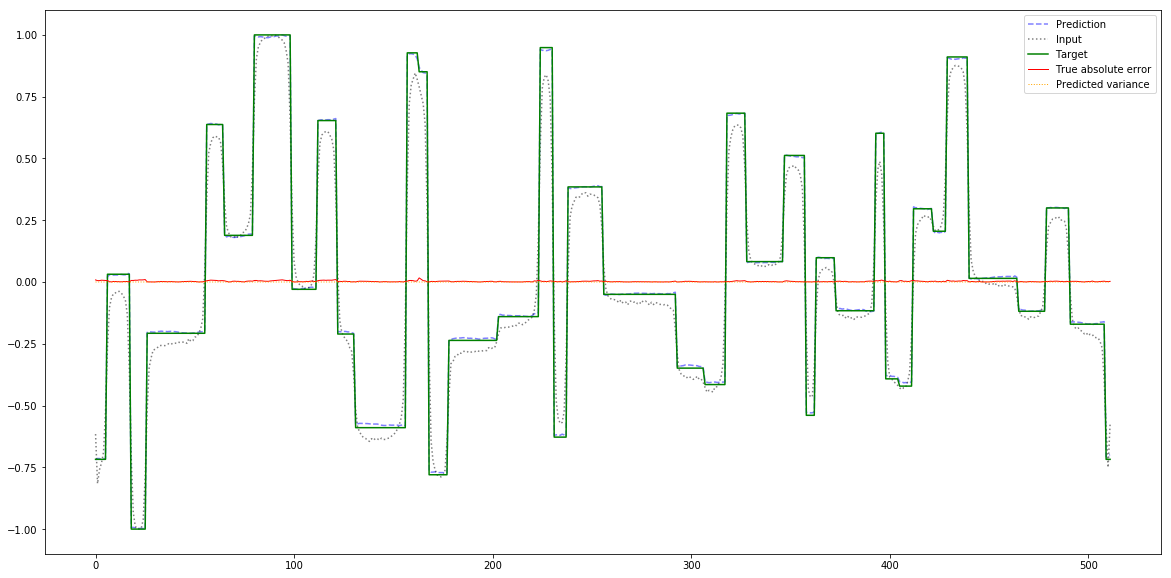

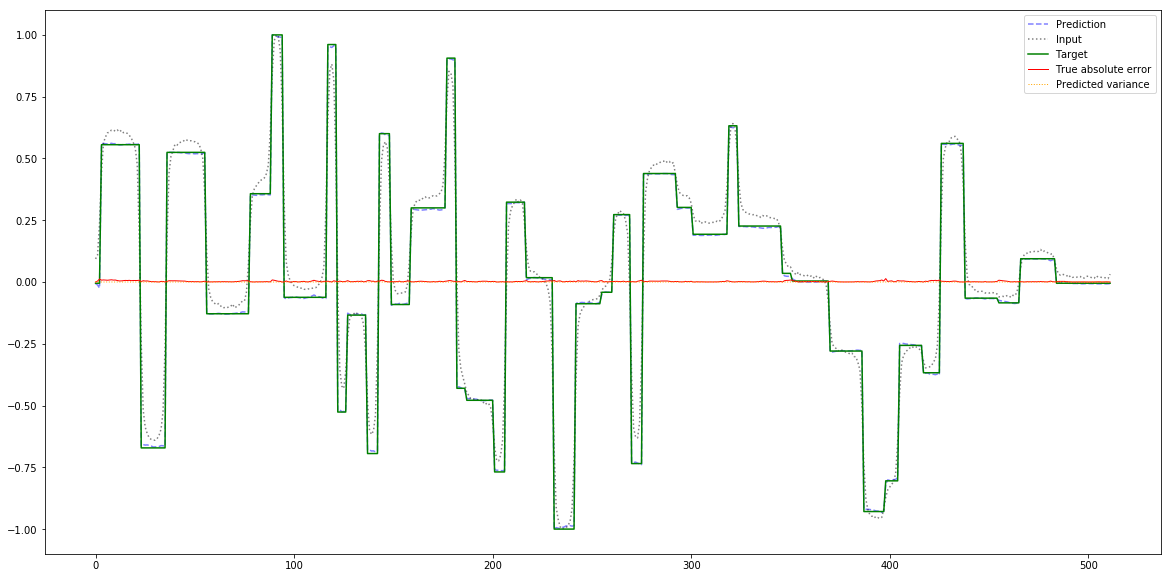

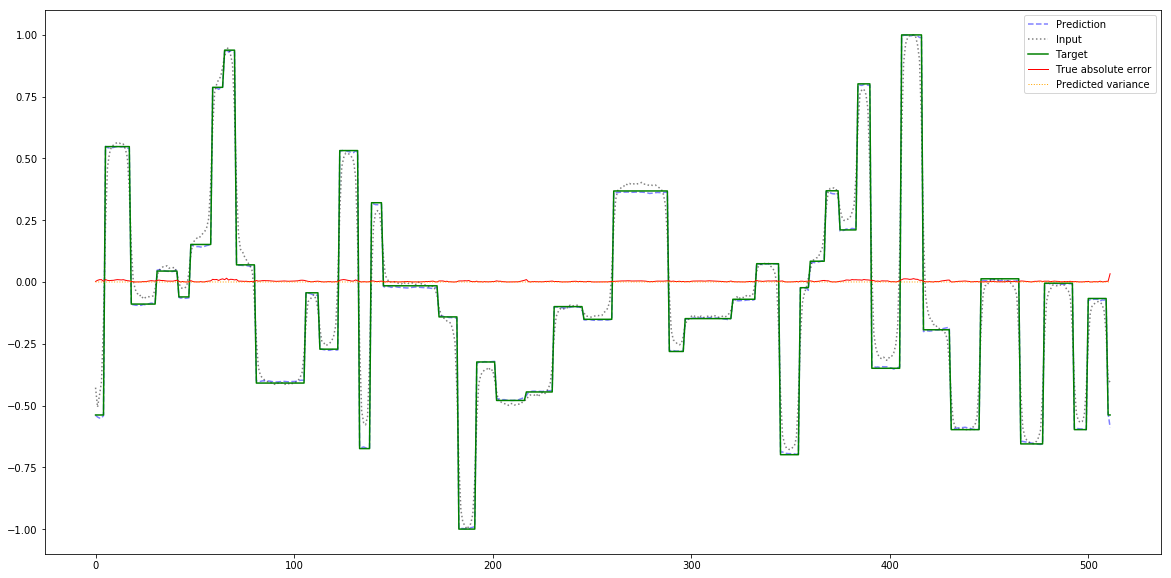

In [51]:
make_plot_var_pred(train_matrices_path, 'train', 6)

(200, 512, 1) (200, 512, 1)


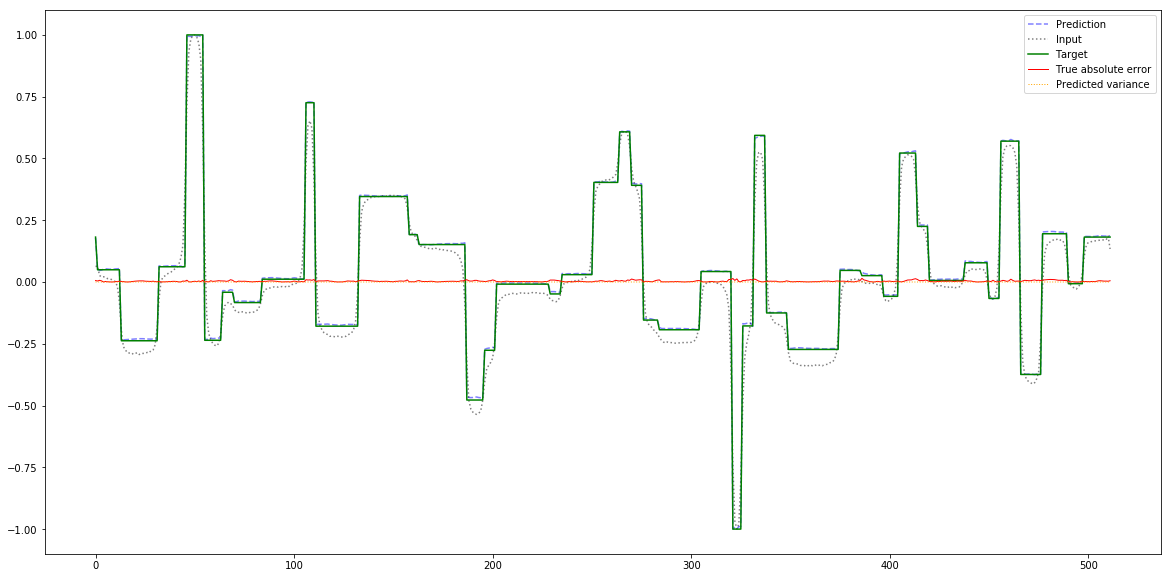

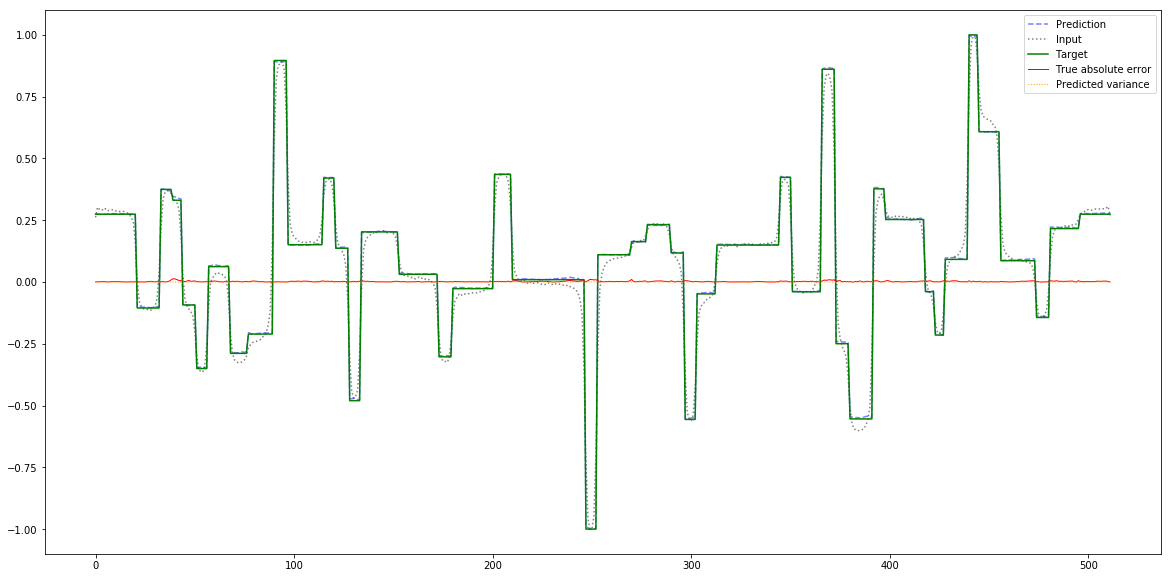

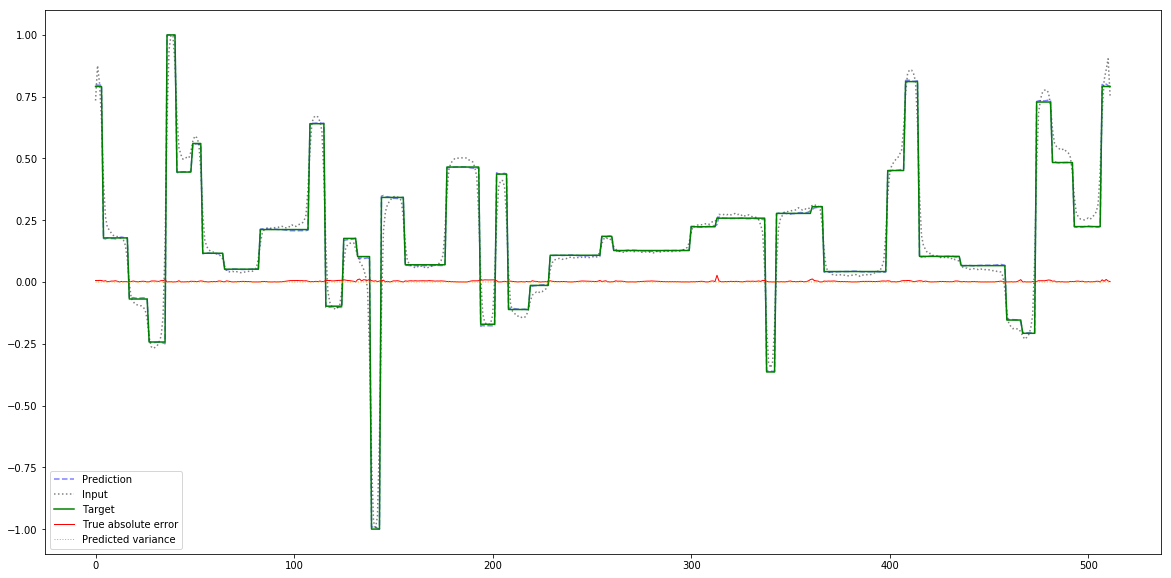

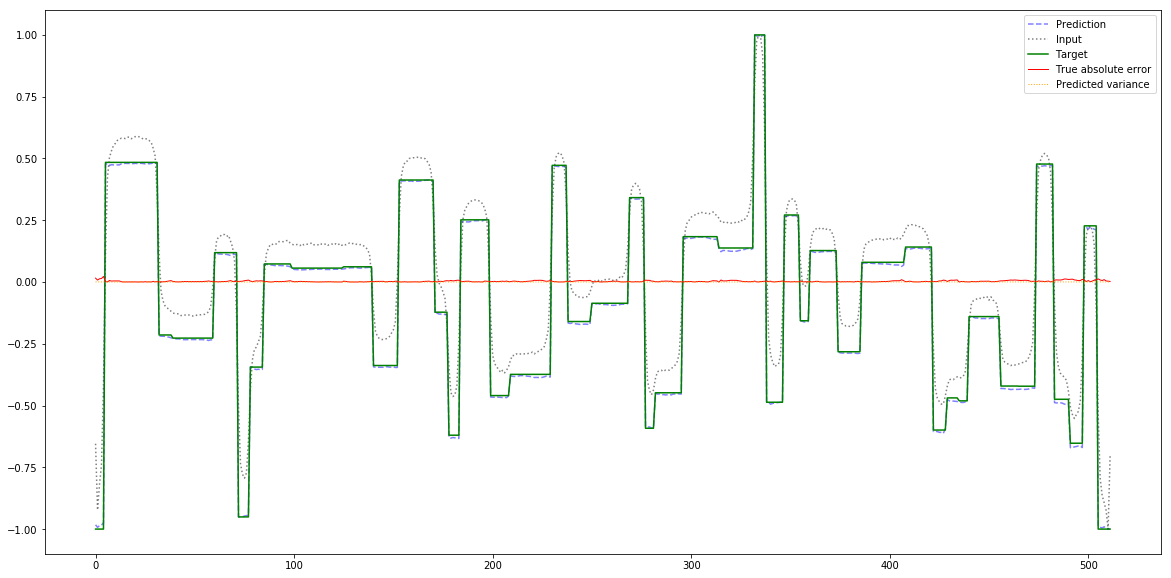

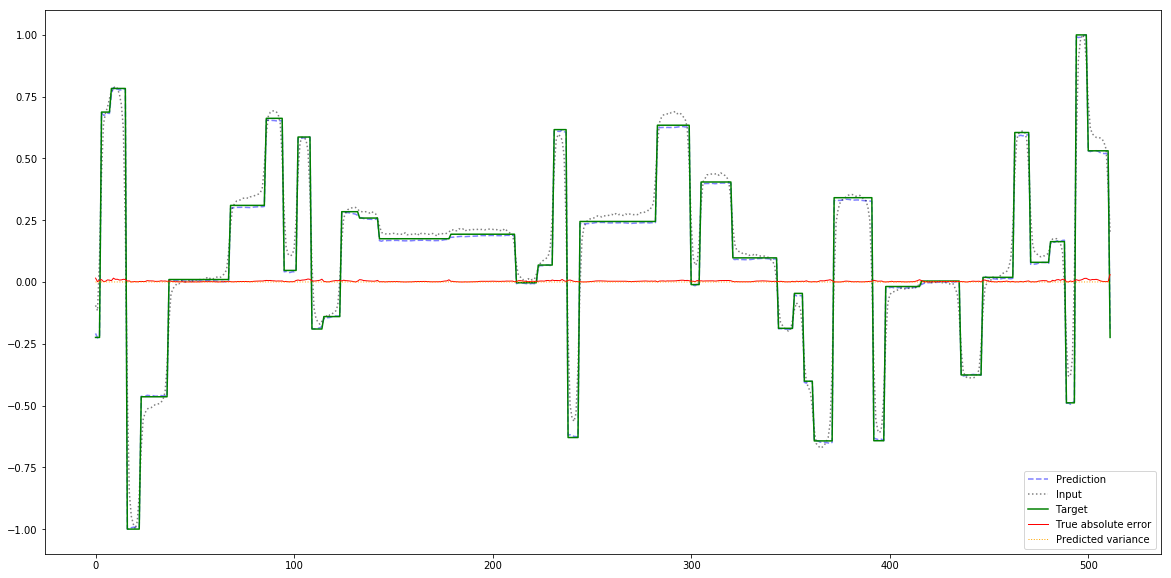

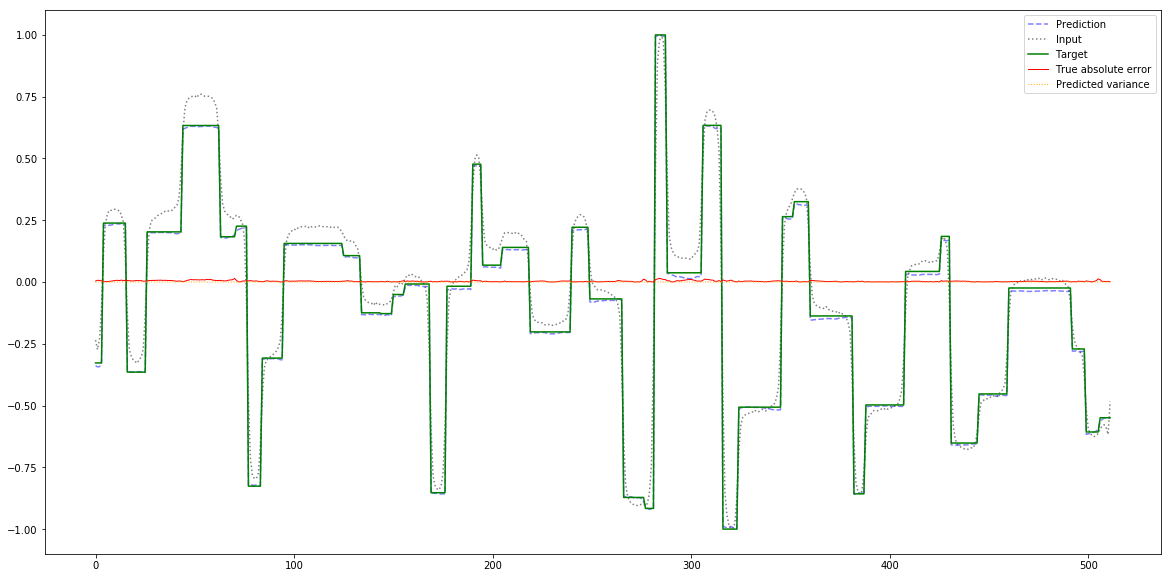

In [52]:
make_plot_var_pred(test_matrices_path, 'test', 6)

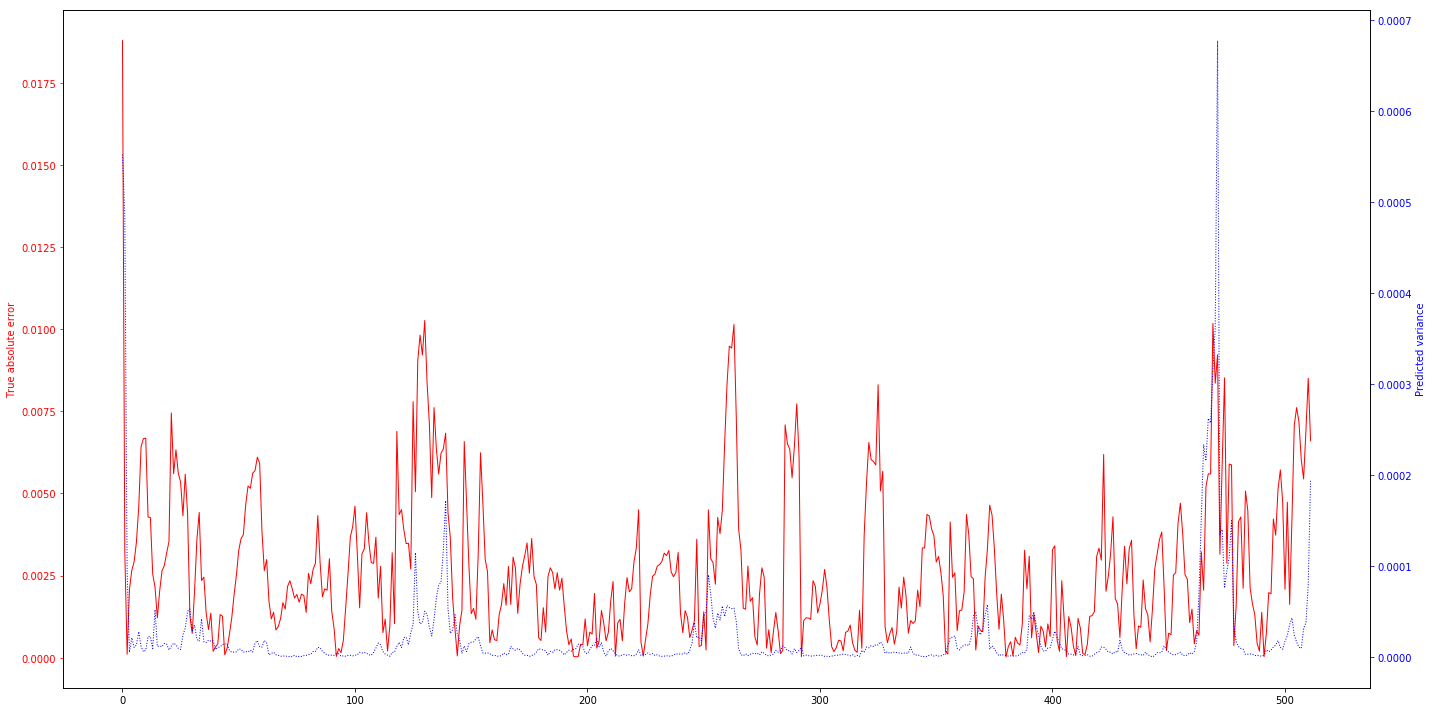

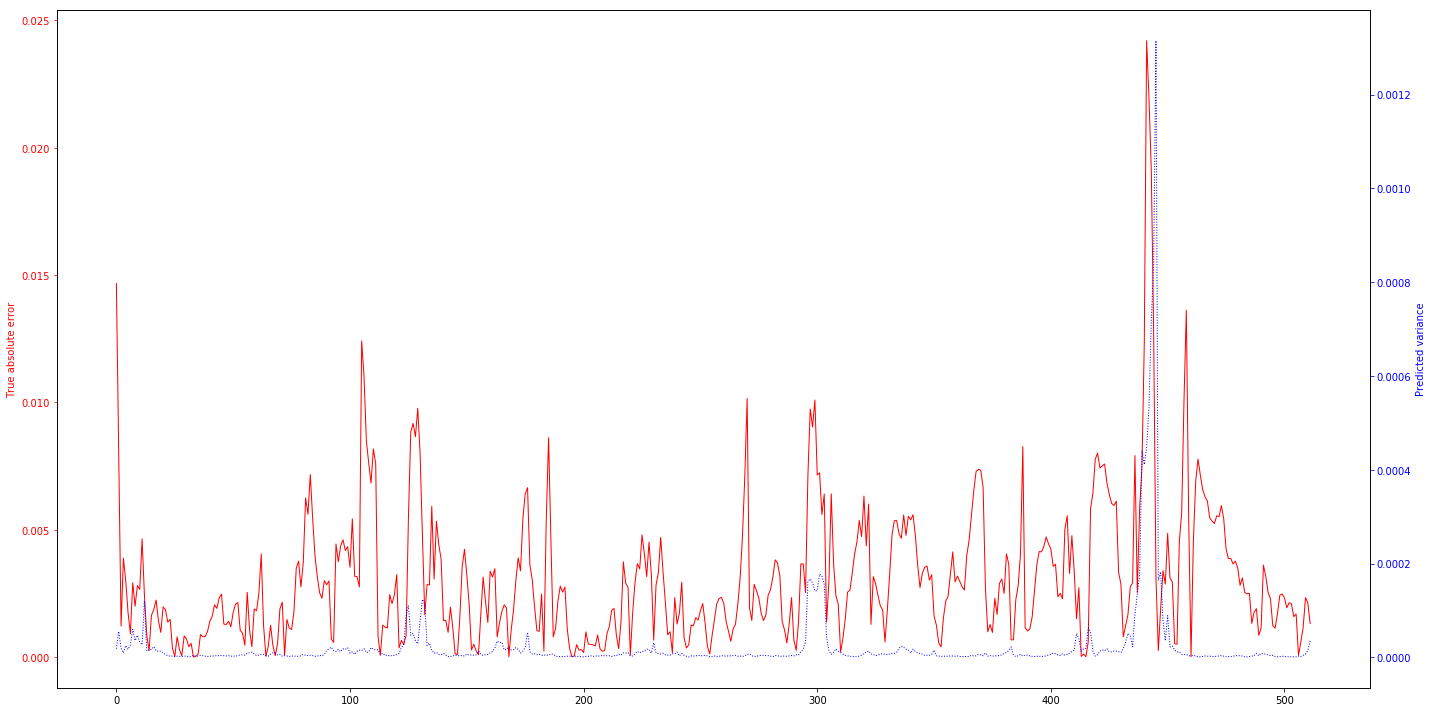

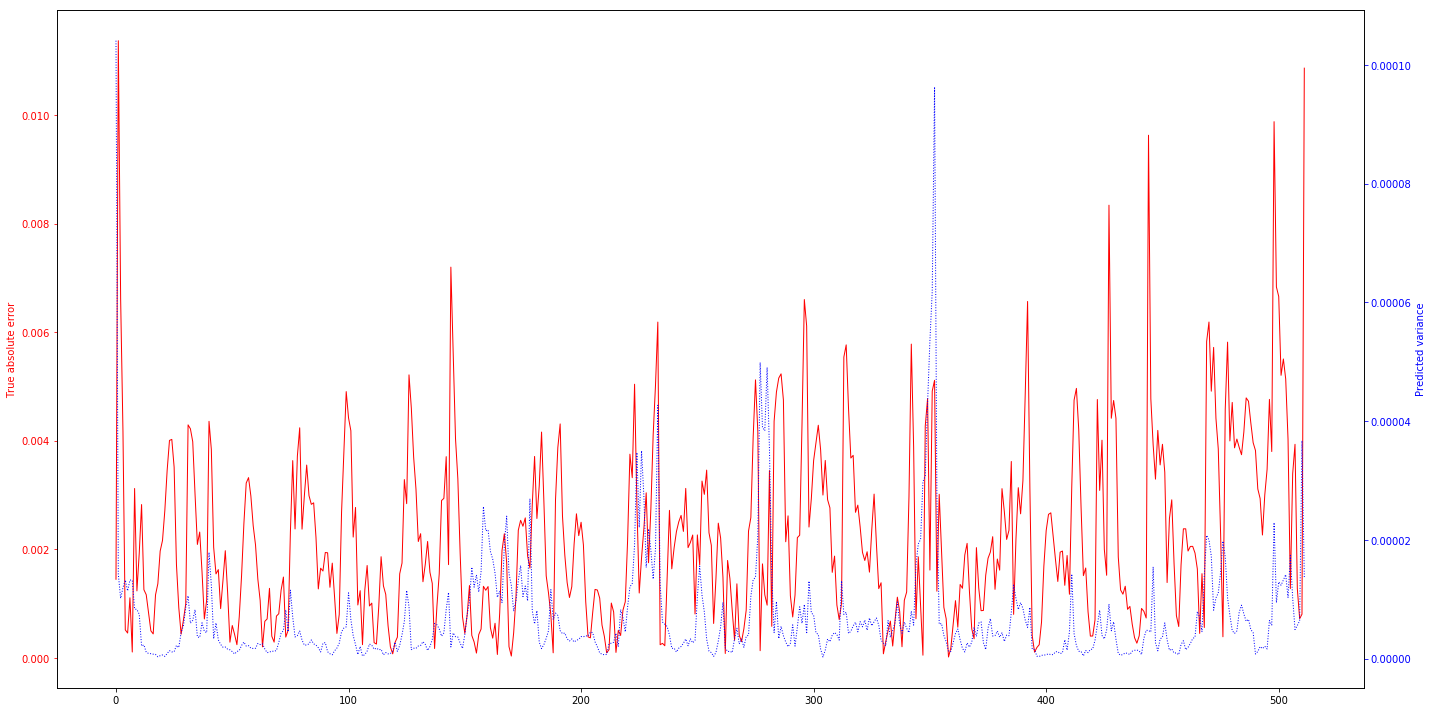

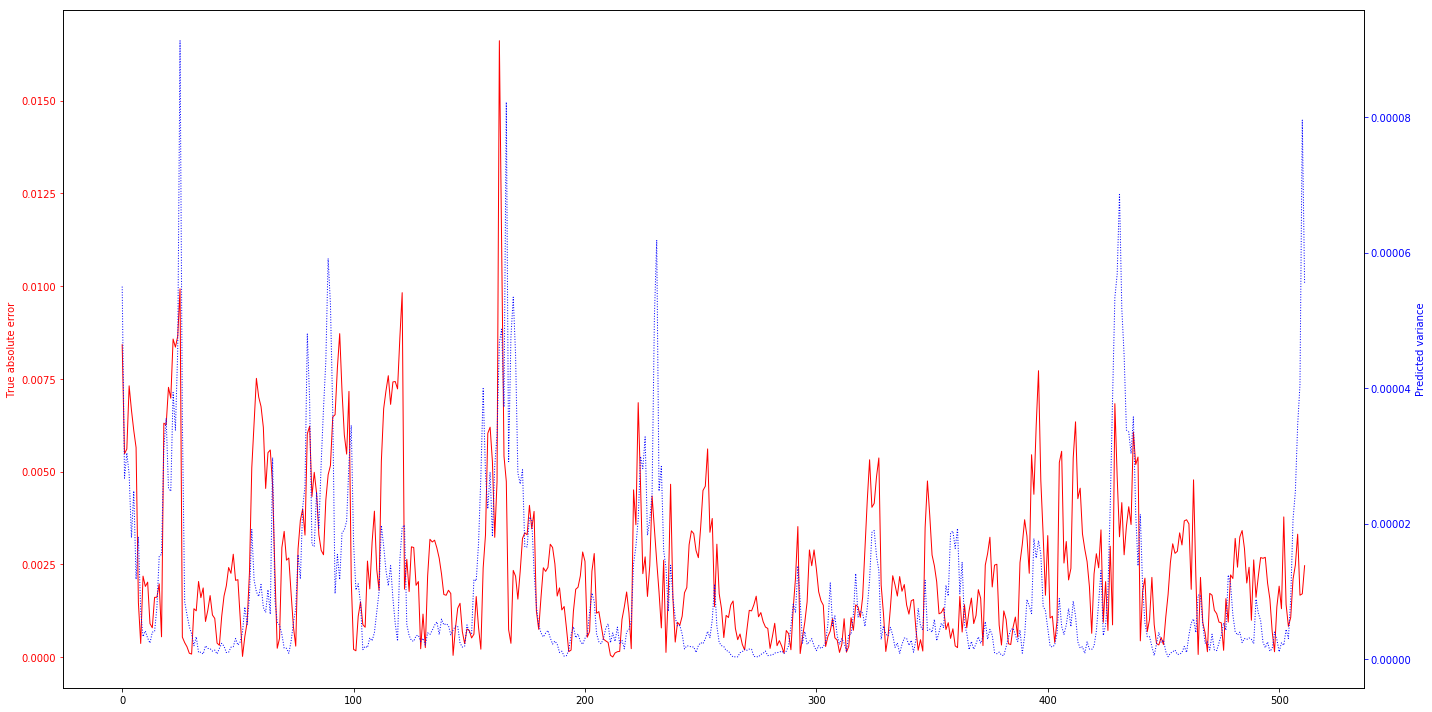

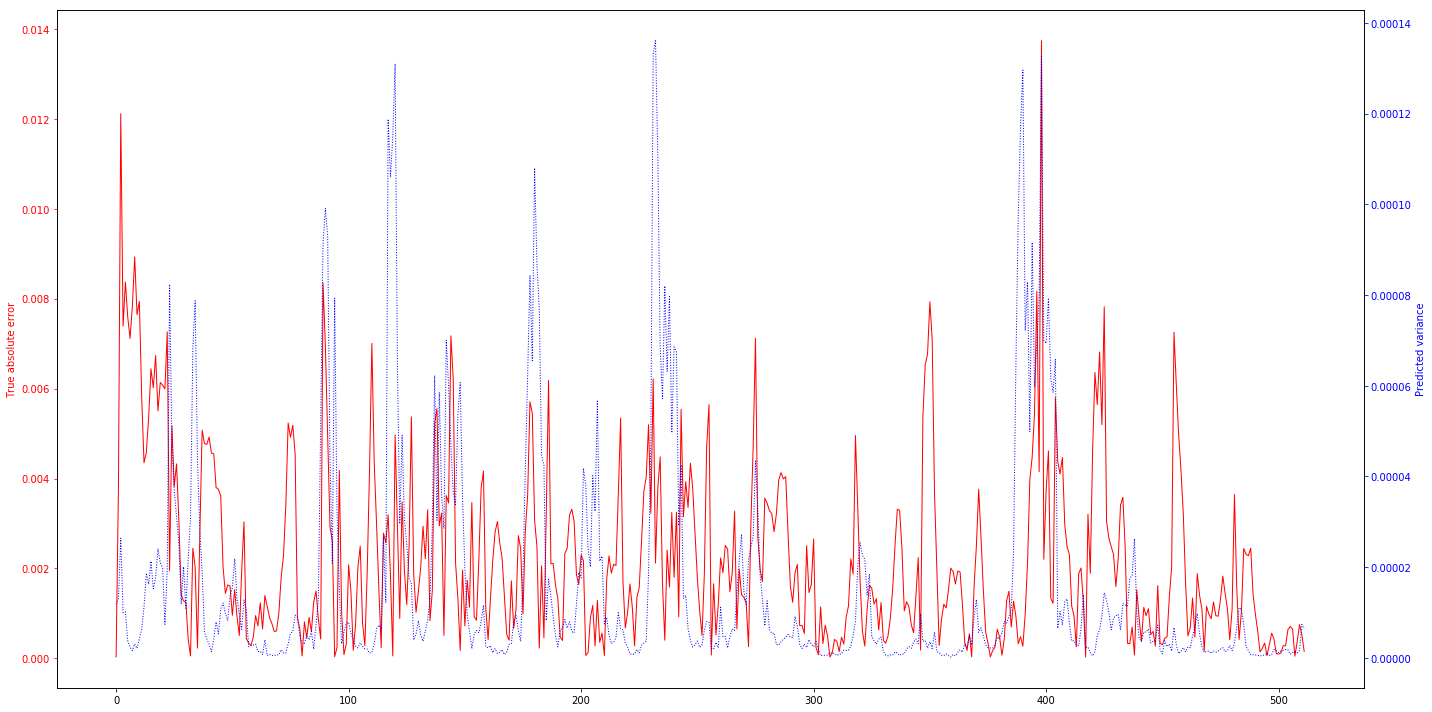

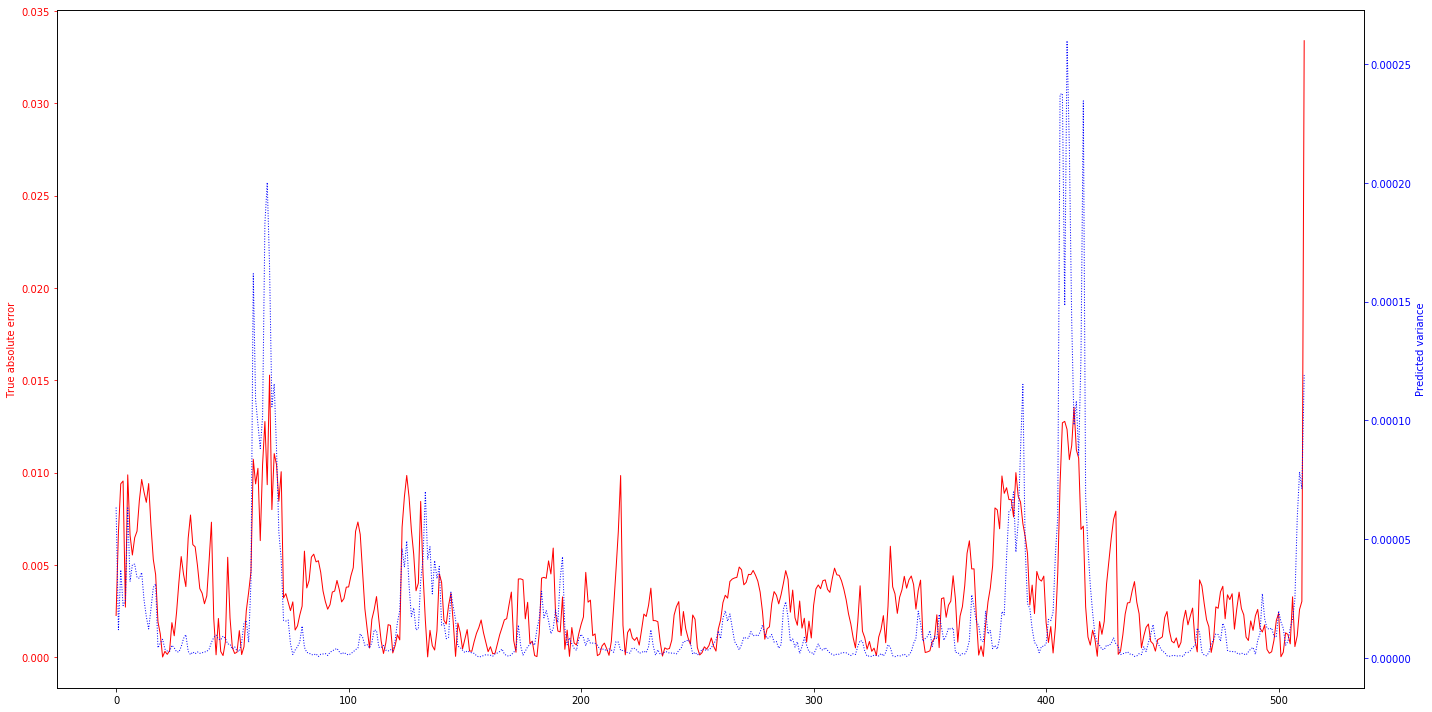

In [53]:
make_plot_error_only(train_matrices_path, 'train', 6)

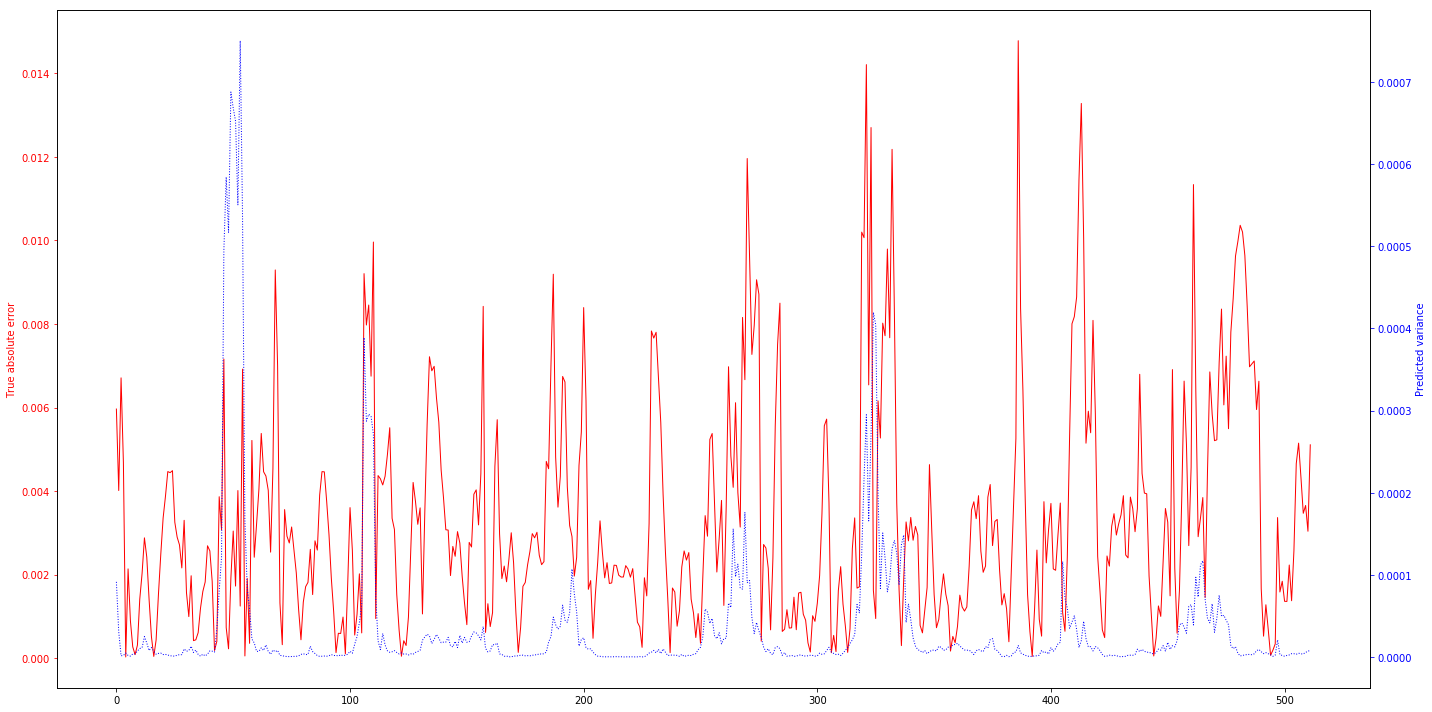

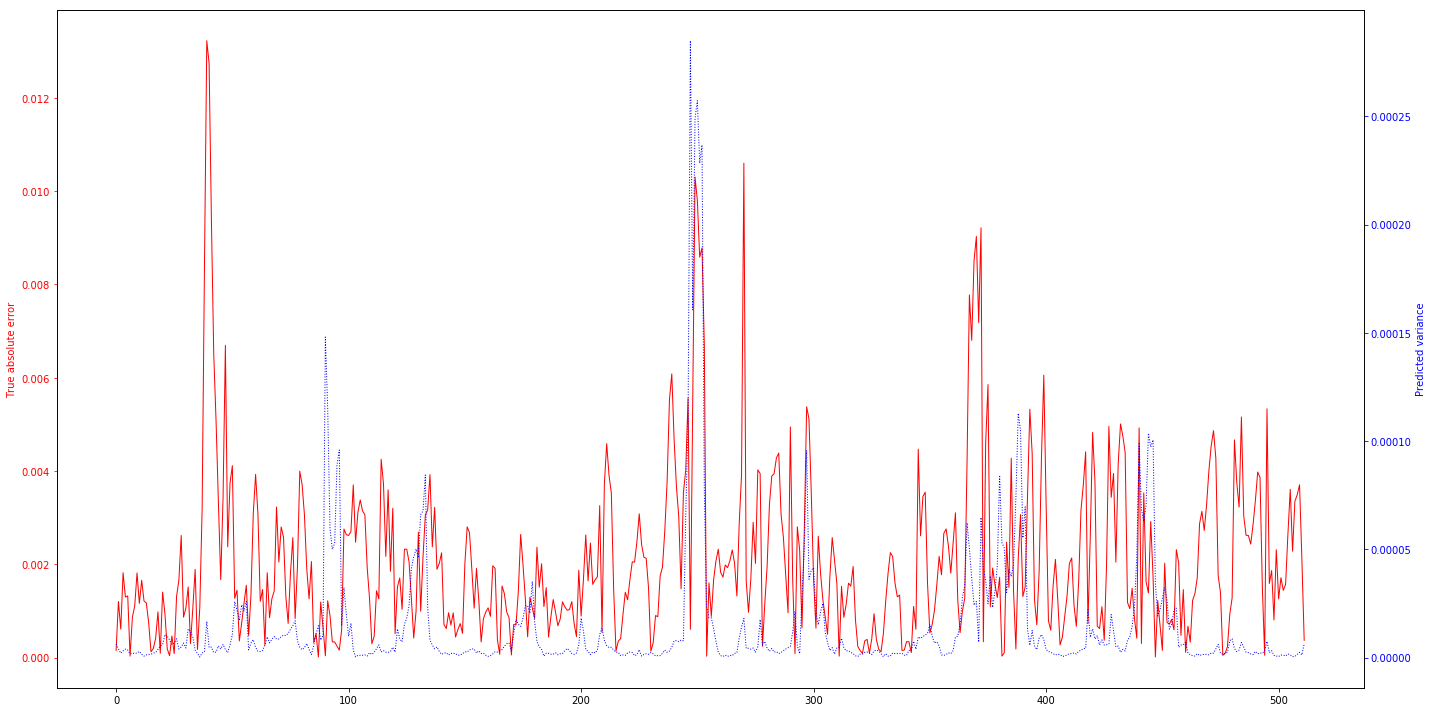

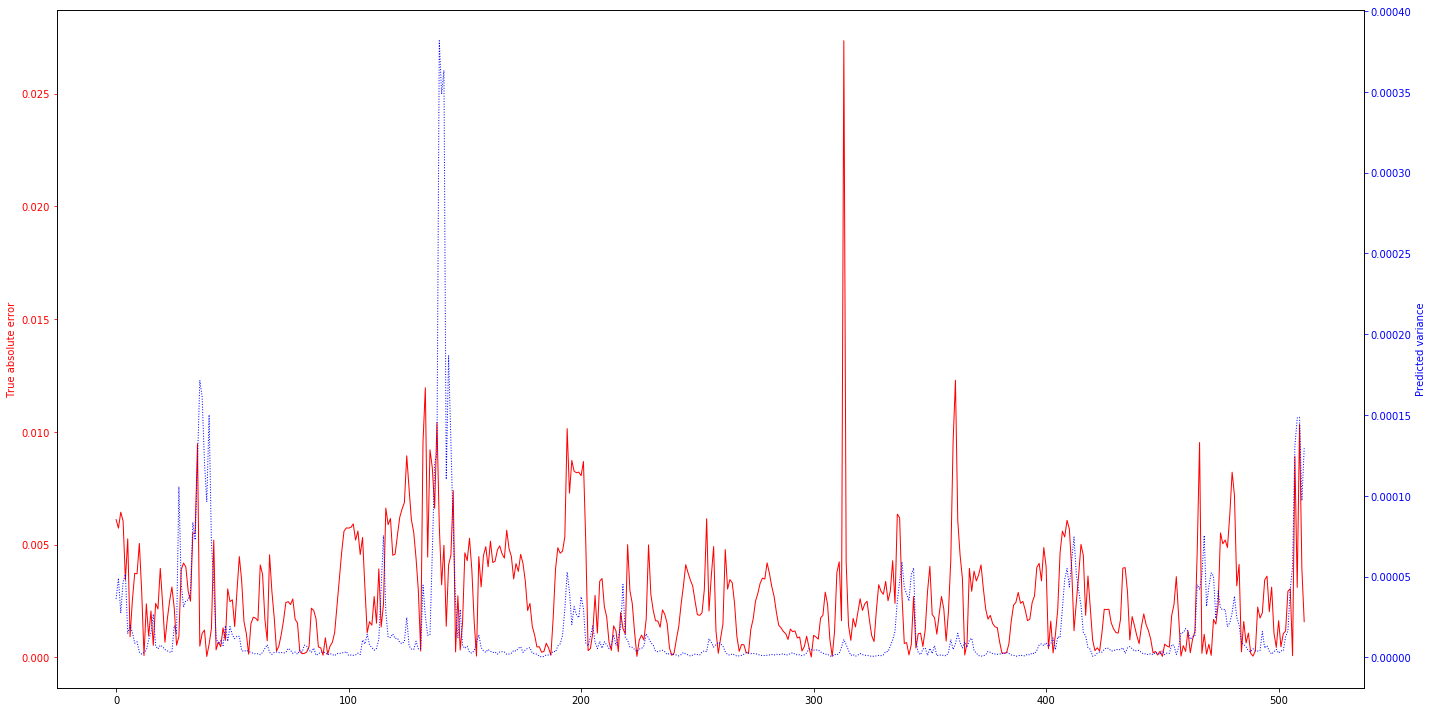

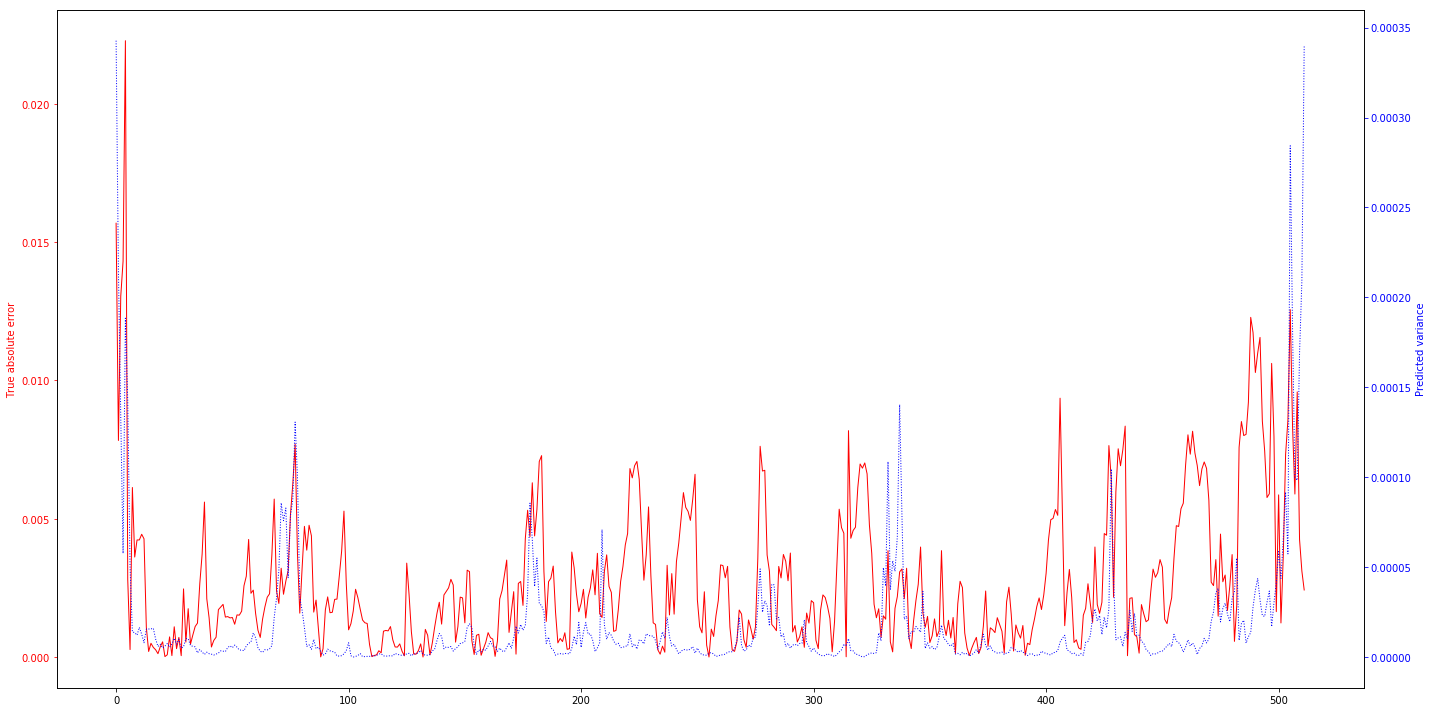

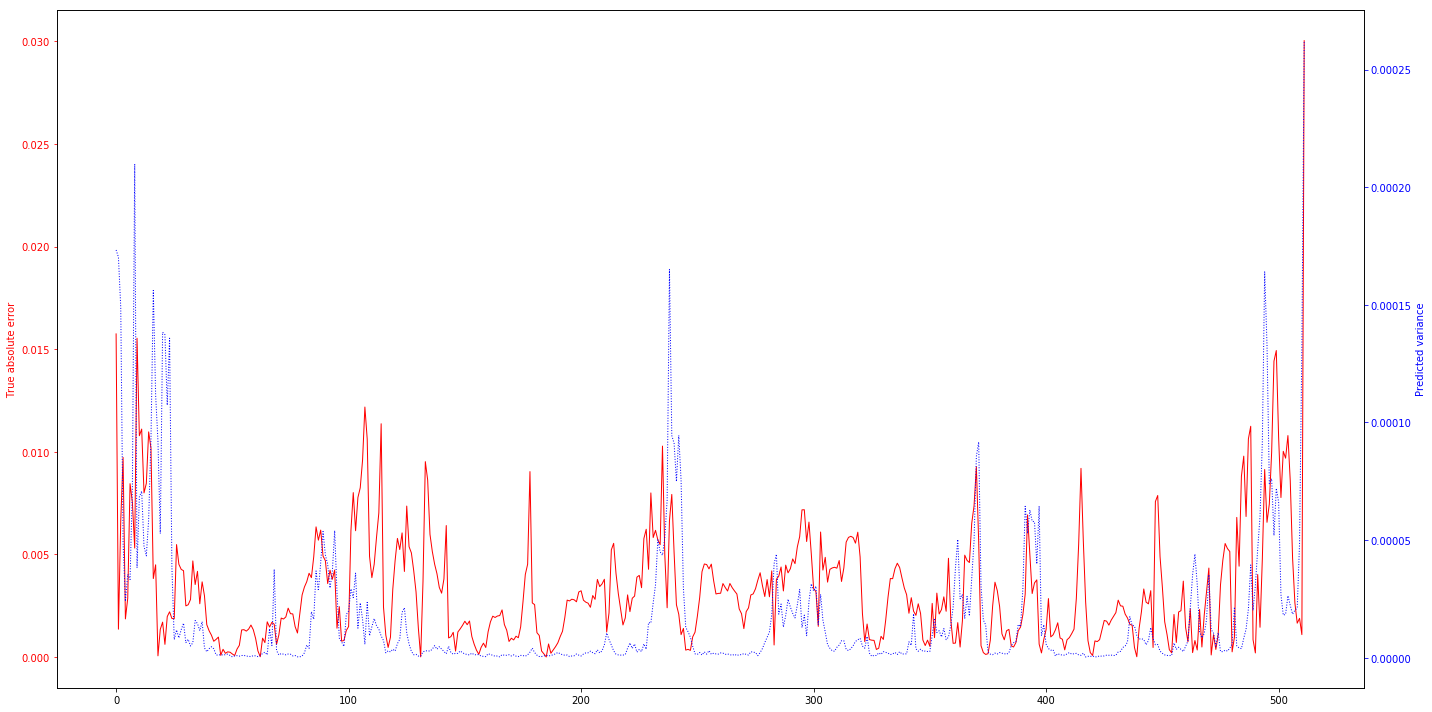

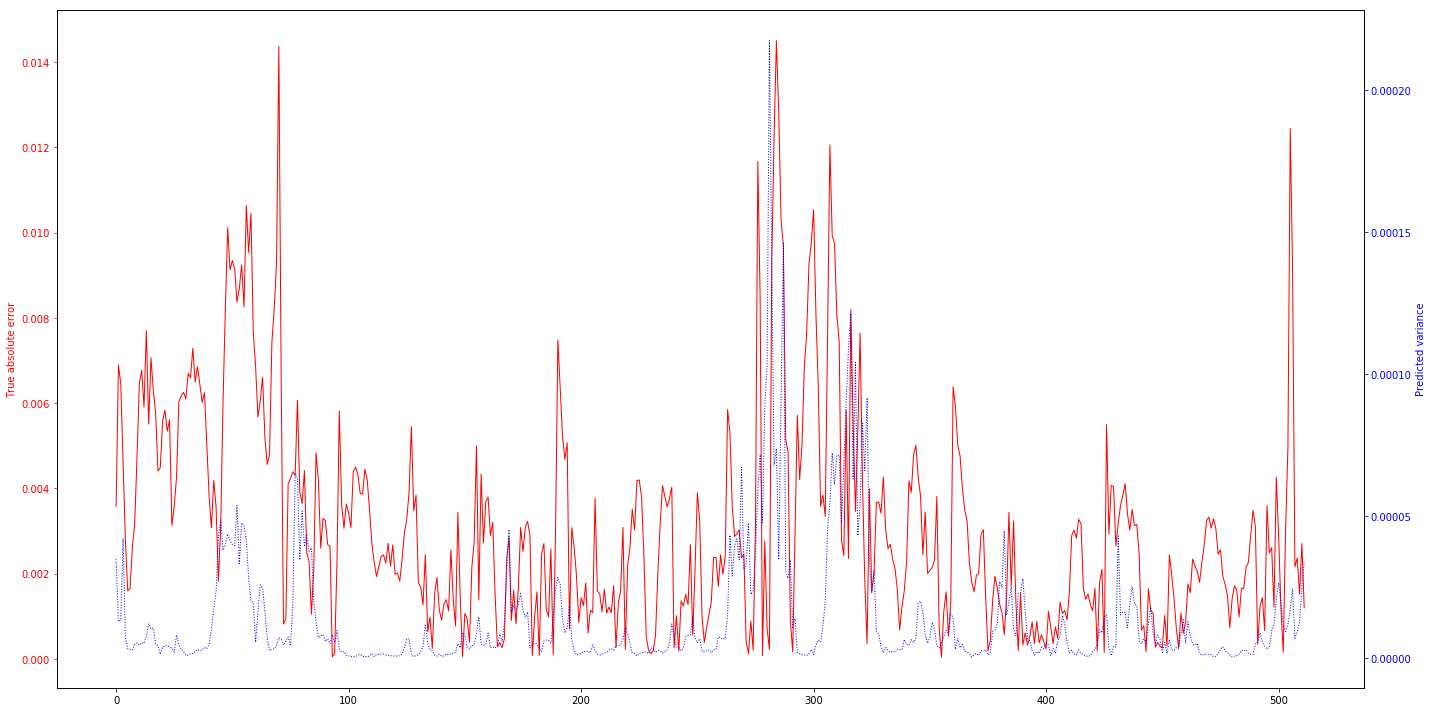

In [54]:
make_plot_error_only(test_matrices_path, 'train', 6)

fig size: 72.0 DPI, size in inches [6. 4.]
timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 0


/home/oala/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


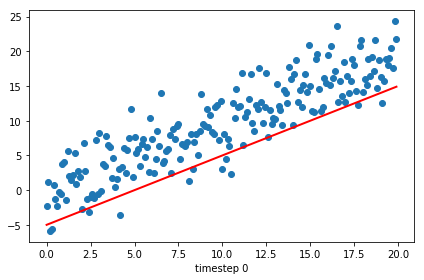

In [56]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax


# FuncAnimation will call the 'update' function for each frame; here
# animating over 10 frames, with an interval of 200ms between frames.
anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
anim.save('line.gif', dpi=80, writer='imagemagick')

In [32]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import scipy.io
import re
import os
import numpy as np

def tryint(s):
    try:
        return int(s)
    except ValueError:
        return s

def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def get_data(path):
    file_names = next(os.walk(path))[2]
    file_names.sort(key=alphanum_key)
    X = []
    Y = []
    print('Reading data ... ')
    for file_name, count in zip(file_names, range(len(file_names))):
        mat = scipy.io.loadmat(path + file_name)
        X.append(mat['y'])
        Y.append(mat['x'])
        if count % 500 == 0:
            print('Done with # ', count)
    X = np.array(X)
    Y = np.array(Y)
    
    print(X.shape)
    print(Y.shape)
    
    return X[:1600], Y[:1600], X[1600:1800], Y[1600:1800], X[1800:], Y[1800:]

    
def get_visualization_data(path_to_epoch_dicts_folder_testdata, path_to_dataset, error_type):
    '''
    Input:
    path_to_epoch_dicts_folder_testdata (string): string that points to folder containing the dict with preds and uncertainty scores of different epochs
    path_to_dataset (string): string that points to folder containinf the entire dataset with inputs and targets
    error_type (string): specifies the type of error
    
    Returns:
    target_signal (np.array): has dims [num data points, d]
    predicted_signal (np.array): has dims [num epochs, num data doints, d]
    error (np.array): has dims [num epochs, num data doints, d]
    uncertainty (np.array): has dims [num epochs, num data doints, d]
    '''
    
    file_names = next(os.walk(path_to_epoch_dicts_folder_testdata))[2]
    file_names.sort(key=alphanum_key)
    
    predicted_signal = []
    uncertainty = []
    
    for file_name, count in zip(file_names, range(len(file_names))):
        matrices_path = path_to_epoch_dicts_folder_testdata+file_name
        with open(matrices_path, 'rb') as handle:
            matrices = pickle.load(handle)
        predicted_signal.append(matrices['pred'])
        uncertainty.append(matrices['uncertainty'])
    
    
    predicted_signal = np.array(predicted_signal)
    uncertainty = np.array(uncertainty)
    _, _, _, _, _, target_signal = get_data(path_to_dataset)
    
    if error_type == 'abs':
        error = np.abs(target_signal - predicted_signal)
    elif error_type == 'squared_diff':
        error = (target_signal - predicted_signal)**2
    elif error_type == 'diff':
        error = target_signal - predicted_signal
    else:
        print('Problem when getting the data for visualization: No valid error was specified')
        
    return target_signal, predicted_signal, error, uncertainty

def make_gif(target_signal, predicted_signal, error, uncertainty, 
             error_type, uncertainty_type, save_filename, dpi, interval, point_number):
    '''
    Input:
    #fixed values
    target_signal (np.array): should have dimension [d]

    #values being updated
    predicted_signal (np.array): should have dimension [num_epochs, d]
    error (np.array): should have dimension [num_epochs, d]
    uncertainty (np.array): should have dimension [num_epochs, d]
    
    #misc variables
    error_type (string): specifies the type of error (for labeling)
    uncertainty_type (string): specifies the type of uncertainty (for labeling)
    save_filename (string): with ending .gif
    dpi (int): resolution of gif framees
    interval (int): time in ms between frames
    point_number (int): id of the test data point we are tracking
    
    Returns:
    None

    '''
    
    fig, ((ax1), (ax2)) = plt.subplots(nrows = 2, ncols = 1, figsize=(20,5))
    fig.set_tight_layout(True)

    # Query the figure's on-screen size and DPI. Note that when saving the figure to
    # a file, we need to provide a DPI for that separately.
    print('fig size: {0} DPI, size in inches {1}'.format(
        fig.get_dpi(), fig.get_size_inches()))

    # Plot a scatter that persists (isn't redrawn) and the initial line.
    d = np.arange(target_signal.shape[0])
    epochs = error.shape[0]

    #manage axis design
    ax2.tick_params('y', colors='red')
    ax3 = ax2.twinx()
    ax3.tick_params('y', colors='black')
    ax2.set_ylim([0,0.022])
    #ax3.set_ylim([0,0.0017])
    ax3.set_ylim([0,0.022])
    ax2.set_ylabel(error_type+' error', color = 'red')
    ax3.set_ylabel(uncertainty_type+' uncertainty', color = 'black')
    
    #all thats fixed
    ax1.plot(d, target_signal, label = 'target signal', color = 'green', lw=2.5)

    #all that changes
    predicted_signal_line, = ax1.plot(d, predicted_signal[0], color = 'deepskyblue', label = 'predicted signal', lw=2.5)
    error_line, = ax2.plot(d, error[0], color = 'red', label = error_type+' error', lw=2.5)
    uncertainty_line, = ax3.plot(d, error[0], color = 'black', label = uncertainty_type+' uncertainty', lw=2.5)
    
    ax1.legend(loc=1)
    #ax2.legend(loc=1)
    #ax3.legend(loc=5)

    def update(i):
        label = 'Epoch {0}'.format(i) + ', test data point #' + str(point_number)
        print(label)
        # Update the line and the axes (with a new xlabel). Return a tuple of
        # "artists" that have to be redrawn for this frame.

        predicted_signal_line.set_ydata(predicted_signal[i])
        error_line.set_ydata(error[i])
        uncertainty_line.set_ydata(uncertainty[i])

        #ax2.set_xlabel(label)
        ax1.set_title(label, fontsize=16)
        #fig.suptitle(label, fontsize=16)
        return predicted_signal_line, error_line, uncertainty_line, ax2


    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=np.arange(0, epochs), interval=interval)
    anim.save(save_filename, dpi=dpi, writer='imagemagick')

Reading data ... 
Done with #  0
Done with #  500
Done with #  1000
Done with #  1500
(2000, 512, 1)
(2000, 512, 1)
fig size: 72.0 DPI, size in inches [20.  5.]
Epoch 0, test data point #3
Epoch 0, test data point #3
Epoch 1, test data point #3
Epoch 2, test data point #3
Epoch 3, test data point #3
Epoch 4, test data point #3
Epoch 5, test data point #3
Epoch 6, test data point #3
Epoch 7, test data point #3
Epoch 8, test data point #3
Epoch 9, test data point #3
Epoch 10, test data point #3
Epoch 11, test data point #3
Epoch 12, test data point #3
Epoch 13, test data point #3
Epoch 14, test data point #3
Epoch 15, test data point #3
Epoch 16, test data point #3
Epoch 17, test data point #3
Epoch 18, test data point #3
Epoch 19, test data point #3
Epoch 20, test data point #3
Epoch 21, test data point #3
Epoch 22, test data point #3
Epoch 23, test data point #3
Epoch 24, test data point #3
Epoch 25, test data point #3
Epoch 26, test data point #3
Epoch 27, test data point #3
Epoch 28,

/home/oala/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


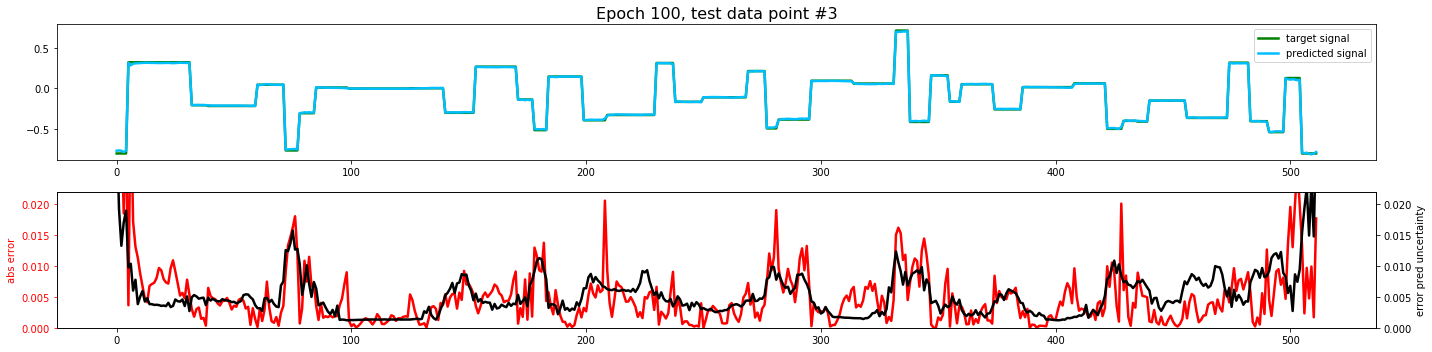

In [33]:
#get data 
path_a = '/home/oala/Documents/QUEAI/luis_messy/quick_and_dirty/conv_test_run_errorpred/matrices-test/'
path_b = '/media/oala/4TB/DATA/experiments-hhi/smoothed_signal/Uncertainty_IP/n_512_dist_5_jumps_60_pow_2/'
error_type = 'abs'
target_signal, predicted_signal, error, uncertainty = get_visualization_data(path_a, path_b, error_type)

#make gif
i = 3 #the test data point we want to track
uncertainty_type, save_filename, dpi, interval = 'error pred', 'drop3.gif', 80, 200
make_gif(target_signal[i], predicted_signal[:,i,:,:], error[:,i,:,:], uncertainty[:,i,:,:], error_type, uncertainty_type, save_filename, dpi, interval, i)